<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Павел! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Привет, Дмитрий. Поправил основные твои замечания: пути, обработка изображений, перемешивание изображений. Но есть проблема, в итоге размерности векторов изображений отличаются от текстов. Как результат, не могу их соединить( ячейка 179) ну и дальше этой ячейки код запустить. Что-то я смотрю и не могу понять что не так(. Если есть возможность, подскажи пожалуйста.

</div>



# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

В файле `train_dataset.csv` собрана информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
import PIL
from PIL import Image
from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import torch.nn as nn
import torch
from torch.utils.data import Dataset, DataLoader
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pulka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но вот лишние импоры лучше убрать, поберечь ресурсы</div>

In [274]:
# вынесемен слова, для фильтрации запрещенных по условиям задания картинок в начало
BLOCK_WORDS = [
    "boy",
    "girl",
    "child",
    "baby",
    "kid",
    "teenager"
    ]

## Загрузка и знакомство с данными (исследовательский анализ)

In [275]:
path = 'D:/сборный проект 4/to_upload/'
path_test = 'D:/сборный проект 4/to_upload/test_images/'
path_train_image = 'D:/сборный проект 4/to_upload/train_images/'
path_test_image = 'D:/сборный проект 4/to_upload/test_images/'

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Хорошо, что ты вынес пути к данным в отдельную константу. Это общепринятый подход.


Но ниже при работе с изображениями ты "хардкодишь" пути и по этому поводу я напишу красные комментарии.
</div>

In [276]:
test_queries = pd.read_csv(path + 'test_queries.csv', index_col=[0], sep='|')
train_dataset = pd.read_csv(path + 'train_dataset.csv')
test_images = pd.read_csv(path + 'test_images.csv')
crowd_ann = pd.read_csv (path + 'CrowdAnnotations.tsv', sep='\t',
                        names=['image', 'query_id', 'ratio_plus', 'count_plus', 'count_minus'])
expert_ann = pd.read_csv (path + 'ExpertAnnotations.tsv', sep='\t',
                        names = ['image', 'query_id', 'score_1', 'score_2', 'score_3'])

In [277]:
print('train_dataset')
display(train_dataset.info())
display(train_dataset.head())
print('--------------------------------------------------------------')
print('test_images')
display(test_images.info())
display(test_images.head())
print('--------------------------------------------------------------')
print('crowd_ann')
display(crowd_ann.info())
display(crowd_ann.head())
print('--------------------------------------------------------------')
print('expert_ann')
display(expert_ann.info())
display(expert_ann.head())

train_dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


None

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


--------------------------------------------------------------
test_images
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


None

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


--------------------------------------------------------------
crowd_ann
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        47830 non-null  object 
 1   query_id     47830 non-null  object 
 2   ratio_plus   47830 non-null  float64
 3   count_plus   47830 non-null  int64  
 4   count_minus  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


None

,image,query_id,ratio_plus,count_plus,count_minus
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


--------------------------------------------------------------
expert_ann
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   score_1   5822 non-null   int64 
 3   score_2   5822 non-null   int64 
 4   score_3   5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


None

,image,query_id,score_1,score_2,score_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Рассмотрим примеры фотографий из тренировочного датасета

In [278]:
images = list(pd.unique(train_dataset['image']))
all_images =[]

for each in images:
    try:
        image = PIL.Image.open(path_train_image + each)
        all_images.append(image)
    except:
        pass

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста избавься от хардкода путей, собери путь с использованием объявленнной в начале константы</div>


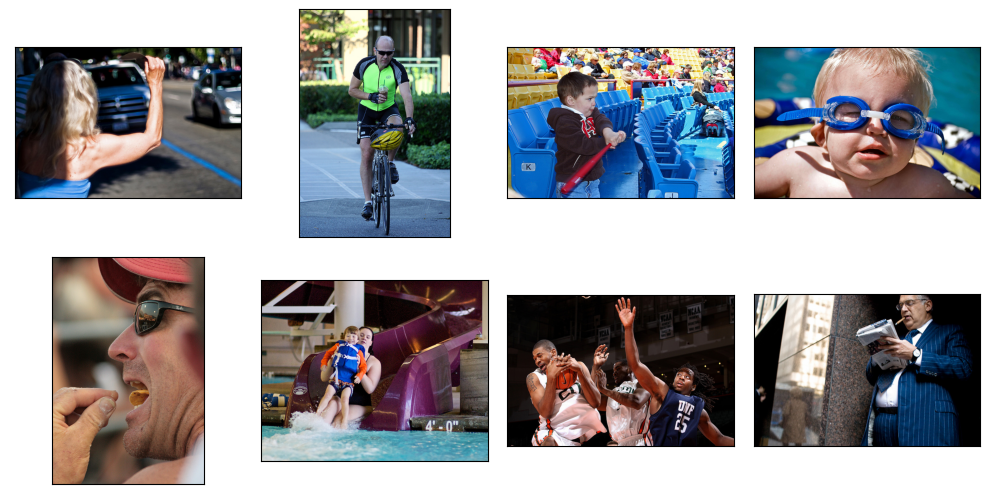

In [279]:
fig_train = plt.figure(figsize=(10,10))
for i in range(8):
    fig_train.add_subplot(4, 4, i+1)
    plt.imshow(all_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд в проекте есть путаница. Советую сделать два раздела
    
 - загрузка из накомство с данными (исследовательский анализ)
 - предобработка
    
на этапе знакомства нужно посмотреть всё, что считаешь важным в датасете, включая изображения, исследование всех  табличек.  и пожалуйста не забывай про выводы
    
а вот уже на этапе предобработки начать эти таблички менять: содинять по ключу, находить общие оценки, фильтровать, обрабатывать пропуски и т.д.  Результатом второго этапа должен стать основной датафрейм с оценками, который мы дальше почистим, векторизуем вектора из изображения и будем учить модель  
</div>

##  Предобработка


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд в проекте есть путаница. Советую сделать два раздела
    
 - загрузка из накомство с данными (исследовательский анализ)
 - предобработка
    
на этапе знакомства нужно посмотреть всё, что считаешь важным в датасете, включая изображения, исследование всех  табличек.  и пожалуйста не забывай про выводы
    
а вот уже на этапе предобработки начать эти таблички менять: содинять по ключу, находить общие оценки, фильтровать, обрабатывать пропуски и т.д.  Результатом второго этапа должен стать основной датафрейм с оценками, который мы дальше почистим, векторизуем вектора из изображения и будем учить модель  
</div>

Объединяем имеющиеся данные по колонкам 'image' и 'query_id'

In [280]:

df = train_dataset.merge(expert_ann, on=['image', 'query_id'], how='left').merge(crowd_ann,
                                     on=['image', 'query_id'], how='left')

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5822 entries, 0 to 5821
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        5822 non-null   object 
 1   query_id     5822 non-null   object 
 2   query_text   5822 non-null   object 
 3   score_1      5822 non-null   int64  
 4   score_2      5822 non-null   int64  
 5   score_3      5822 non-null   int64  
 6   ratio_plus   2329 non-null   float64
 7   count_plus   2329 non-null   float64
 8   count_minus  2329 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 454.8+ KB


In [282]:
df.head()

,image,query_id,query_text,score_1,score_2,score_3,ratio_plus,count_plus,count_minus
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,0.0,0.0,3.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,NaN,NaN,NaN
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,2,2,0.0,0.0,3.0
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4,4,4,1.0,3.0,0.0
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,NaN,NaN,NaN


In [283]:
df[['image', 'query_id', 'query_text']].describe()

,image,query_id,query_text
count,5822,5822,5822
unique,1000,977,977
top,3364151356_eecd07a23e.jpg,2600867924_cd502fc911.jpg#2,"Two dogs , one brown and white and one black a..."
freq,10,34,34


Как видно из таблицы, в тренировочном датасете у нас 1000 изображений, имеющих 5822 связей с описаниями, 977 из которых уникальны.

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


### Построение сводной экспертной оценки
Используем метод голосования:
- если 2 эксперта поставили одинаковую оценку, она считается верной
- если все три оценки разные, такое описание отбрасывается

In [284]:
#функция, которая принимает три оценки и возвращает одну
def vot(x1, x2, x3):
    if x1 == x2 or x1 == x3:
        return x1
    elif x2 == x3:
        return x2
    else:
        return None

In [285]:
df['experts'] = df.apply(
    lambda x: vot(x['score_1'], x['score_2'], x['score_3']), axis=1)

In [286]:
df = df.dropna(subset=['experts'])

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [287]:
#масштабируем даные
scaler = MinMaxScaler()
df["experts"] = scaler.fit_transform(df[["experts"]])

In [288]:
df.head()

,image,query_id,query_text,score_1,score_2,score_3,ratio_plus,count_plus,count_minus,experts
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,0.0,0.0,3.0,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,NaN,NaN,NaN,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,2,2,0.0,0.0,3.0,0.333333
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4,4,4,1.0,3.0,0.0,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1,1,1,NaN,NaN,NaN,0.000000


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 0 to 5821
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        5696 non-null   object 
 1   query_id     5696 non-null   object 
 2   query_text   5696 non-null   object 
 3   score_1      5696 non-null   int64  
 4   score_2      5696 non-null   int64  
 5   score_3      5696 non-null   int64  
 6   ratio_plus   2258 non-null   float64
 7   count_plus   2258 non-null   float64
 8   count_minus  2258 non-null   float64
 9   experts      5696 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 489.5+ KB


In [290]:
df = df[['image', 'query_id', 'query_text', 'experts']]

In [291]:
df.head()

,image,query_id,query_text,experts
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.333333
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000


In [292]:
df.shape

(5696, 4)

В столбцах с краундсорсинговыми оценками больше половины данных отсутствует. Поэтому в качестве итоговой примем оценку экспертов с учетом голосования и масштабирования.
 df['experts'] - целевая переменая.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Согласен. Технически можно было бы придумать правило получения итоговой оценки. Но действительно экспертные оценки качественнее и добавление краудсор оценок ухудшит их качество.


Однако ты должен понимать, что мы теряем очень много данных. И есть другой подход - соединение датафреймов с экспертными и краудсорс оценками через outer, корректная предобработка. В этом случае мы сможем работать примерно с 50К оценок.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Еще один интересный и нечевидный шаг по "майнингу" данных. Если внимательно посмотреть на структуру query_id, то окажется, что он содержит в себе имя файла, для которого написана аннотация. Т.е. у нас есть около 1000 гарантированно подходящих друг к другу пар изображение-описание.  Было бы неплохо обогатить ими наши данные. Только не забывавай, что некоторые такие пары уже есть в датасете, нужно соединять аккуратно.
    
    
</div>

## Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

1. Определяем плохие комментарии.
- Последовательно ищем слова из стоп-листа child_stop в заданном тексте text.
- Возвращаем True, если нашлось хотя бы одно слово
2. Удаляем найденные изображения с детьми:
- у `query_id`  плохих комментариев отрезаем два последних символа и получаем список плохих изображений.
- удаляем все записи, содержащие эти изображения

In [293]:
nlp = spacy.load("en_core_web_sm")

In [294]:
%%time
def preprocess(text):
    text = text.lower()
    spacy_results = nlp(text)
    text = ' '.join([token.lemma_ for token in spacy_results])
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

CPU times: total: 0 ns
Wall time: 0 ns


In [295]:
%%time
df['query_text'] = df['query_text'].apply(preprocess)

CPU times: total: 27.6 s
Wall time: 27.9 s


In [296]:
def child_text(text):
    res = False
    for w in BLOCK_WORDS:
        res |= text.find(w) > -1
    return res

In [297]:
df['child'] = df.apply(
    lambda x: child_text(x['query_text']), axis=1)

In [298]:
df.head()

,image,query_id,query_text,experts,child
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.000000,True
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.000000,True
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.333333,True
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,1.000000,True
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.000000,True


In [299]:
child_images = df[df['child'] == True]['query_id']


In [300]:
child_images = [x[:-2] for x in child_images]

In [301]:
child_images = set(child_images)

In [310]:
df = df.drop(
    df[df['image'].isin(child_images)].index, axis=0).reset_index()

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       4008 non-null   int64  
 1   image       4008 non-null   object 
 2   query_id    4008 non-null   object 
 3   query_text  4008 non-null   object 
 4   experts     4008 non-null   float64
 5   child       4008 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 160.6+ KB


Осталось 4008 записей.

In [314]:
df = df[['image', 'query_id', 'query_text', 'experts']]

In [315]:
df.head()

,image,query_id,query_text,experts
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.0
2,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.0
3,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.0
4,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,a young child be wear blue goggle and sit in a...,0.0


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Ты слишком радикально почистил датасет и у нас почти не осталось изображений. Давай проанализируем что ты сделал.
    
Пусть у нас была пара: изображение машины + описание "ребенок" и оценка соответствия 0. Но ты решил что на машине ребенок и удалил её из датасета.
    
    
Советую использовать один из двух подходов:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
        
    
    


</div>


## 3. Векторизация изображений

Found 4003 validated image filenames.


c:\Users\pulka\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 5 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


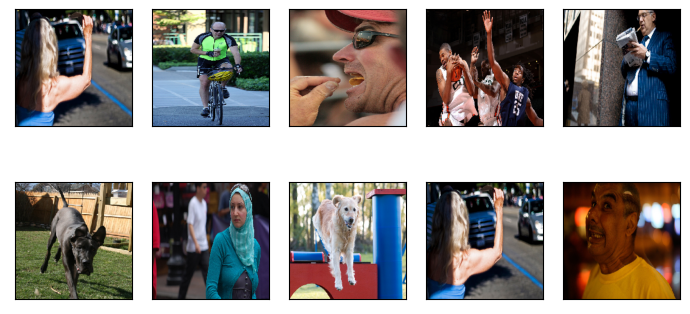

In [304]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=df,
        directory = path_train_image,
        x_col='image',
        y_col='score',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        seed=RANDOM_STATE,
        shuffle = False)

flow_train = train_gen_flow
features, target = next(flow_train)

fig = plt.figure(figsize=(7,5))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Ты зря отказался от векторизации изображений через pytorch, которая была рассмотрена в тренажере. Конечно, допустимо использовать Keras, но предобработка, которая дана в тренажере скорее всего позволит получить более качественные эмбеддинги. 

Но комментарий связан с другим. У flow_from_dataframe есть аргумент shuffle и по умолчанию он включен. Это означает, что изображения перемешиваются, а значит ты получишь перемешанные эмбеддинги.
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста избавься от хардкода путей, собери путь с использованием объявленнной в начале константы</div>


In [305]:
def create_model():
    backbone = ResNet50V2(input_shape=(224, 224, 3),
                          include_top=False,
                          weights='imagenet')

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())

    model.compile(loss='mean_squared_error',
                  optimizer=Adam(lr=0.0001),
                  metrics=['mae'])

    return model



def vectorize_pic(model, train_data):
    return model.predict(train_data)

In [306]:
%%time

pictures_emb = vectorize_pic(create_model(), flow_train)

251/251 [==============================] - 140s 553ms/step
CPU times: total: 3min 31s
Wall time: 2min 21s


In [307]:
pictures_emb.shape

(4003, 2048)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Тут ОК, но в боевых проектах, когда будешь обрабатывать  большие объемы данных очень не советую преобразовывать данные в датафреймы. Осавайся в нумпай массивах, они гораздо оптимальнее по памяти и быстрее.</div>

In [221]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.684462,0.019736,0.000000,0.268523,0.354969,0.0,1.240483,0.127550,0.203643,0.00000,...,1.031370,0.035968,1.177605,0.002916,0.235133,1.292416,0.268984,0.010041,0.404005,0.420230
1,0.193766,0.228129,0.224822,0.000000,0.197045,0.0,0.053675,1.436813,0.194433,0.00000,...,0.232430,0.978056,0.008609,0.001912,0.138872,0.088308,0.414363,0.420944,0.052451,0.000000
2,0.466322,0.000000,0.354997,0.011803,0.631888,0.0,0.019479,0.000000,0.000000,0.00000,...,0.024381,0.086726,1.356673,0.000804,0.000000,0.879357,0.249017,0.386514,0.326199,0.000000
3,1.697574,0.151947,0.054838,0.567927,0.150432,0.0,0.496893,0.475868,0.014643,0.03406,...,0.000000,0.000000,1.871687,0.012418,0.004522,0.000000,0.649264,0.000000,0.028279,0.039122
4,0.000000,3.664249,0.063677,0.547759,0.131606,0.0,2.884553,0.109888,0.072978,0.22622,...,2.453069,1.202308,0.976338,0.008639,0.176859,0.280328,2.153562,0.051996,0.311522,0.483702


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Не стоит выводить весь датафрейм. Да, внешне ты видишь первые и последние пять строк. Но под капотом интерпретатор python работает со всем датафреймом, занимается оперативная память, пишутся служебные файлы... По итогу это может привести к замедлению работы и проблемам с работоспособностью тетрадки.
    
Лучше всегда явно ограничивать количество обрабатываемых значений.
</div>

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [320]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pulka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [321]:
vectorizer = TfidfVectorizer(stop_words=stop_words)

In [322]:

tf_matrix= vectorizer.fit_transform(df['query_text'])

In [323]:
tf_matrix.shape

(4008, 1158)

In [324]:
features_text = pd.DataFrame(tf_matrix.toarray())

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
И опять же переход к датафреймам мне кажется лишним </div>

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [179]:
features = np.concatenate((pictures_emb, features_text), axis=1)
features.shape

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 4003 and the array at index 1 has size 4008

In [ ]:
target = np.array(df['experts'])
target.shape

(1433,)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## 6. Обучение модели предсказания соответствия

 Разделим датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.


In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=RANDOM_STATE)



train_indices, test_indices = next(gss.split(X=features,
                                             y=target,
                                             groups=df['image']
                                             ))

features_train, features_test = features[train_indices], features[test_indices]

target_train, target_test = target[train_indices], target[test_indices]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [ ]:
scaler = StandardScaler().fit(features_train)
features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, масштабирование входа важно для многих моделей (линейные, нейронки).

Молодец, что обучаешь скалер на обучающем наборе а затем применяешь к валидационному.
</div>

В качестве метрики используем среднее абсолютное отклонение MAE. MAE достаточно проста в трактовке – она возвращает среднюю абсолютную разницу между прогнозируемыми значениями и фактическими значениями в наборе данных. Чем ниже MAE, тем лучше модель соответствует набору данных.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Линейная регрессия

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Учитывая сложность наших данных я бы начал с бейзлайна - константной модели.  Получив бейзлайн мы будем понимать, насколько хороши или плохи наши модели

</div>

In [ ]:
%%time
model = LinearRegression()

model.fit(features_train, target_train)
train_score = mean_squared_error(target_train,model.predict(features_train))
test_score = mean_squared_error(target_test,model.predict(features_test))

print('train_score =' , train_score)
print('test_score =' , test_score)

train_score = 0.16148551145615672
test_score = 5.646310461844251e+24
CPU times: total: 1.34 s
Wall time: 486 ms


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 ОГО, какое сильное переобучение..  Попробуй родственника линейной регрессии с регуляризацией (Ridge/Lasso)</div>

### Ridge

In [ ]:
%%time
model = Ridge()

model.fit(features_train, target_train)
train_score = mean_squared_error(target_train,model.predict(features_train))
test_score = mean_squared_error(target_test,model.predict(features_test))

print('train_score =' , train_score)
print('test_score =' , test_score)

### Catboost

In [ ]:
%%time
model_cat = CatBoostRegressor(verbose=0,
                          random_state=RANDOM_STATE)
model_cat.fit(features_train, target_train)
train_score = mean_squared_error(target_train,model_cat.predict(features_train))
test_score = mean_squared_error(target_test,model_cat.predict(features_test))

print('train_score =' , train_score)
print('test_score =' , test_score)


train_score = 0.012218607627215603
test_score = 0.11124563450585956
CPU times: total: 12min 27s
Wall time: 2min 41s


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### Нейронная сеть

In [ ]:
# переведем наши признаки в тензоры для дальнейшей работы
X_train = torch.FloatTensor(features_train)
y_train = torch.FloatTensor(target_train)
X_test = torch.FloatTensor(features_test)
y_test = torch.FloatTensor(target_test)

In [ ]:
dataset_train = torch.utils.data.TensorDataset(X_train, y_train)
dataset_test = torch.utils.data.TensorDataset(X_test, y_test)

train_dataloader = DataLoader(dataset_train, batch_size=12, shuffle=True,
                              num_workers=0)
test_dataloader = DataLoader(dataset_test, batch_size=12, num_workers=0)

In [ ]:
n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 10
n_hidden_neurons_2 = 5
n_out_neurons = 1
num_epochs = 1001
lr = 0.1

In [ ]:
# создадим класс для полносвязной нейронной сети
class Net(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1,
                                     n_hidden_neurons_2,
                                     n_out_neurons,
                                     dropout_rate_1):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dropout1 = nn.Dropout(dropout_rate_1)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_out_neurons)
        self.act3 = nn.ReLU()


    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)
        x = self.act3(x)



        return x

In [ ]:
np.random.seed(42)
torch.manual_seed(42)
torch.use_deterministic_algorithms(True)

# обучим модель
dropout_rate_1=0.4

train = []
test = []
model = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2,
            n_out_neurons, dropout_rate_1)
loss = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        data_train, y_train = batch
        optimizer.zero_grad()
        preds = model.forward(data_train).flatten()
        loss_value_train = loss(preds, y_train)
        train.append(loss_value_train.tolist())
        loss_value_train.backward()
        optimizer.step()

    if epoch % 100 == 0 or epoch == num_epochs - 1:
        with torch.no_grad():
            model.eval()
            for batch in test_dataloader:
                data_test, y_test = batch
                test_preds = model.forward(data_test).flatten()
                loss_value_test = loss(test_preds, y_test)
                test.append(loss_value_test.tolist())
        print('epoch {}, MSE train {:.4f}, MSE test {:.4f}'.format(
                    epoch, loss_value_train, loss_value_test))

epoch 0, MSE train 0.5000, RMSE test 0.1852
epoch 100, MSE train 0.0000, RMSE test 0.1852
epoch 200, MSE train 0.0556, RMSE test 0.1852
epoch 300, MSE train 0.5556, RMSE test 0.1852
epoch 400, MSE train 0.0556, RMSE test 0.1852
epoch 500, MSE train 0.5556, RMSE test 0.1852
epoch 600, MSE train 0.0556, RMSE test 0.1852
epoch 700, MSE train 0.0000, RMSE test 0.1852
epoch 800, MSE train 0.2222, RMSE test 0.1852
epoch 900, MSE train 0.0556, RMSE test 0.1852
epoch 1000, MSE train 0.0556, RMSE test 0.1852


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом разделе есть проблема и заключается она в следующем. Для векторизации изображений ты использовал Keras, основанный на TF.  А итоговую модель пишешь на Pytorch. Поддержка двух DL фреймворков - это будет ад для девопса. Поэтому хорошей практикой является использование одного фреймворка в одном проекте. Стоит перейти к одному фреймворку</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Этот проект направлен на отработку навыка работы с нейронными сетями. Поэтому попробуй нейронкой хотя-бы побить бейзлайн, который даст Dummy модель.</div>

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255.)
flow_test = test_datagen.flow_from_dataframe(
dataframe = test_images,
directory = path_test_image,
x_col = 'image',
y_col = None,
target_size = (224, 224),
batch_size = 16,
class_mode = 'input',
seed = RANDOM_STATE,
shuffle = False)

Found 100 validated image filenames.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Сейчас изображения тоже перемешиваются.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста избавься от хардкода путей, собери путь с использованием объявленнной в начале константы</div>


In [ ]:
pic_emb = vectorize_pic(create_model(), flow_test)


7/7 [==============================] - 7s 675ms/step


(100, 2048)

In [ ]:
pic_emb = pd.DataFrame(pic_emb)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, это хорошо, что векторизация изображений происходит заранее, а векторизация текстов - на лету. </div>

### Функция проверки модели (с выводом предупреждения)

In [ ]:
def lemm(x):
    spacy_results = nlp(x)
    new = ([token.lemma_ for token in spacy_results])
    return new

In [ ]:
def definitioin_picture(text):

    lemmas = lemm(text)

    # Выводим предупреждение
    if any(lemma in BLOCK_WORDS for lemma in lemmas):
        print('\n' + '*' * 40, text, '*' * 40)
        print('\nThis image is unavailable in your country in compliance with local laws.\n')

    else:
        features_text = lemm(text)
        features_text = pd.DataFrame(vectorizer.transform(features_text).toarray())
        features_text = np.resize((features_text),(pic_emb.shape[0], 809))
        features = np.concatenate((pic_emb, features_text), axis=1)
        features = scaler.transform(features)
        predictions = model_cat.predict(features)
        test_images['pred'] = np.reshape(predictions, (predictions.shape[0],))

        # Топ 5 картинок
        top_df = test_images.sort_values(by='pred', ascending=False).head(5)
        top = top_df['image'].tolist()
        top_score = top_df['pred'].tolist()

        print('\n' + '*' * 40, text, '*' * 40 + '\n')

        fig = plt.figure(figsize=(15,5))
        plt.rcParams['axes.edgecolor'] = 'black'
        plt.rcParams['axes.linewidth'] = 0

        for i in range(5):
            fig.add_subplot(1, 6, i+1, title=round(top_score[i], 2))
            image = Image.open(path_test + top[i])
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        if text in list(test_queries['query_text']):
            plt.rcParams['axes.edgecolor'] = 'red'
            plt.rcParams['axes.linewidth'] = 5
            fig.add_subplot(1, 6, 6)
            image = Image.open(path_test + test_queries.iloc[test_queries[test_queries['query_text'] == text].index[0]]['image'])
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()

        plt.show()

    return None

### Выбираем 5 случайных запросов.

In [ ]:
samples = test_queries.sample(5)
text_test = list(samples['query_text'])
text_test

['a large group of young people all dressed in white tops and green bottoms',
 'Two young boys are squirting water at each other .',
 'Three little boys standing next to and on a fence .',
 'A boy flying a red and white kite .',
 'Two kids playing with a dog .']


************************************************************ a large group of young people all dressed in white tops and green bottoms ************************************************************



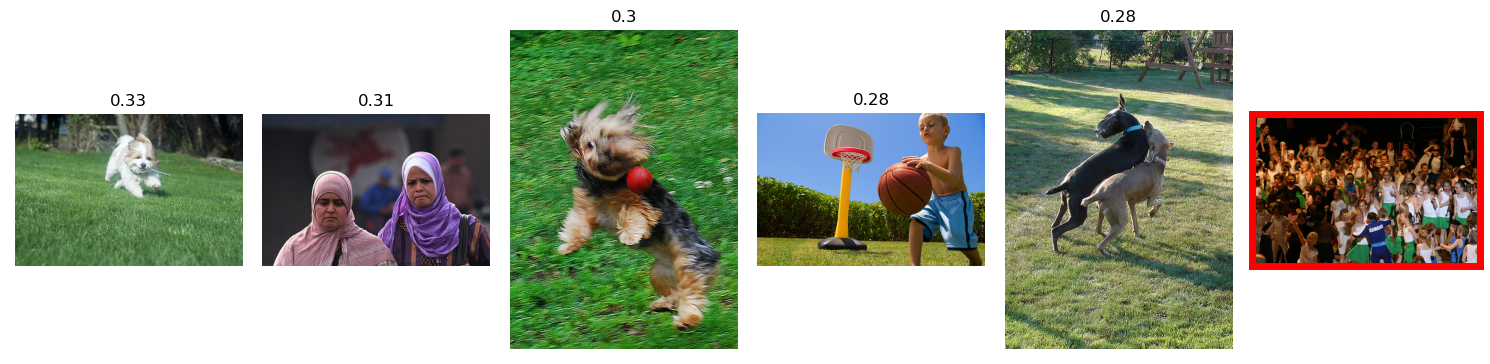


************************************************************ Two young boys are squirting water at each other . ************************************************************

This image is unavailable in your country in compliance with local laws.


************************************************************ Three little boys standing next to and on a fence . ************************************************************

This image is unavailable in your country in compliance with local laws.


************************************************************ A boy flying a red and white kite . ************************************************************

This image is unavailable in your country in compliance with local laws.


************************************************************ Two kids playing with a dog . ************************************************************

This image is unavailable in your country in compliance with local laws.



In [ ]:
for text in text_test:
    definitioin_picture(text)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".
    
----    

Но к сожалению работают обученные модели  они не очень. И причин тут несколько - мало данных, не очень правильный подход. Хотя на мой взгляд самая весомая причина - это ошибка при векторизации изображений, из за которых мы учили модели "на мусоре".</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>

**Вывод**:

- загрузили и взглянули на данные;
- провели исследовательский анализ данных, объединили данные в общий датасет;
- удалили описания и изображения, попадающие под ограничения законодательства;
- векторизовали изображения с помощью ResNet50;
- векторизовали текстовые данные;
- обучили три модели, у которых получили следующие метрики: MSE линейной регрессии – 5,6, MSE Catboost'а -0,11 , MSE нейронной сети – 0.18
- провели тестирование модели.


## 8. Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>
Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Получены признаки из текста и изображений, обучены модели регрессии. Но к сожалению текущее качество модели сильно хромает.
    
Что нужно доделать обязательно:
    
   - Разобраться с чисткой данных от детских изображений. Сейчас ты удалил почти все.
   - Пожалуйста убери хардкод путей из проекта
   - Нужно исправить ошибку при векторизации изображений 
    
Желтые комментарии на твое усмотрение. Но в паре комментариев про обучение нейронки выполни хотя-бы один.
    
Жду твою работу на повторное ревью.
</div>